In [2]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

import json
import os
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
from IPython.display import display

drive.mount('/content/drive')
diretorio = '/content/drive/MyDrive/Redes Neurais/DATA/'

Mounted at /content/drive


In [5]:
X_t = np.load(diretorio+'X_train.npy')
y_t = np.load(diretorio+'y_train.npy')

X_v = np.load(diretorio+'X_test.npy')
y_v = np.load(diretorio+'y_test.npy')

X_t.shape, y_t.shape

((8640, 100, 52), (8640, 52))

In [6]:
model = Sequential()

model.add(InputLayer((100, 1)))
model.add(Conv1D(filters=20, kernel_size=2))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=10, kernel_size=2))
model.add(Flatten())
model.add(Dense(512, 'relu'))
model.add(Dense(128, 'sigmoid'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 99, 20)            60        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49, 20)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 48, 10)            410       
                                                                 
 flatten (Flatten)           (None, 480)               0         
                                                                 
 dense (Dense)               (None, 512)               246272    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                        

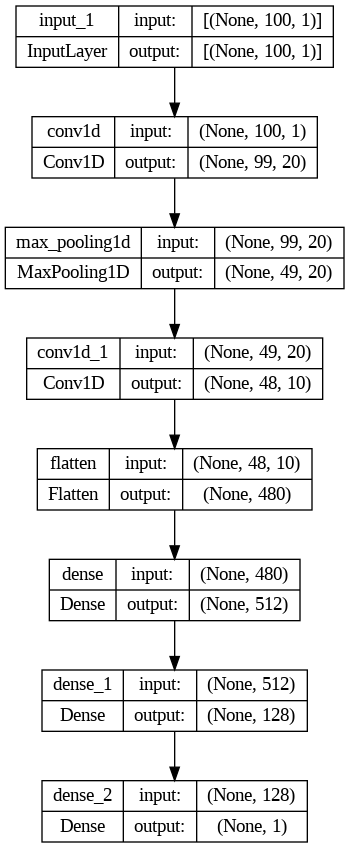

In [7]:
plot_model(model, show_shapes=True)

In [8]:
EPOCHS = 100
batch_size = 64
patience = 20 #no improvement patience

In [9]:
model.compile(optimizer='adam', loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])
earlystopper = EarlyStopping(monitor='loss', patience=patience, restore_best_weights=True, verbose=0)

In [10]:
def plot_series_diff(series1, series2, i=0):
    # Calcula a diferença entre as séries
    diff = series1 - series2
    abs_diff = np.abs(diff)

    # Plota as séries originais
    plt.figure(figsize=(10, 6))
    plt.plot(series1, color='blue', label='Original', linewidth=1)
    plt.plot(series2, color='orange', label='Predicted', linewidth=1)

    # Plota a diferença entre as séries
    plt.plot(diff, color='green', label='Difference')

    # Plota o módulo da diferença entre as séries
    plt.plot(abs_diff, color='red', label='Absolute Difference')

    plt.title(f'Time Series {i+1}')
    plt.legend()

    plt.savefig('/content/drive/MyDrive/Redes Neurais/results/CNN/uni/sensor_'+str(i)+'_diff.png')

    plt.show()

Epoch 1/100
87/87 [==============================] - 13s 14ms/step - loss: 0.0198 - root_mean_squared_error: 0.1409 - val_loss: 3.7825e-04 - val_root_mean_squared_error: 0.0194
Epoch 2/100
87/87 [==============================] - 1s 6ms/step - loss: 3.0721e-04 - root_mean_squared_error: 0.0175 - val_loss: 3.6403e-04 - val_root_mean_squared_error: 0.0191
Epoch 3/100
87/87 [==============================] - 0s 6ms/step - loss: 2.6557e-04 - root_mean_squared_error: 0.0163 - val_loss: 1.6811e-04 - val_root_mean_squared_error: 0.0130
Epoch 4/100
87/87 [==============================] - 1s 6ms/step - loss: 2.7623e-04 - root_mean_squared_error: 0.0166 - val_loss: 1.5286e-04 - val_root_mean_squared_error: 0.0124
Epoch 5/100
87/87 [==============================] - 1s 6ms/step - loss: 1.9452e-04 - root_mean_squared_error: 0.0139 - val_loss: 1.2524e-04 - val_root_mean_squared_error: 0.0112
Epoch 6/100
87/87 [==============================] - 0s 6ms/step - loss: 1.7732e-04 - root_mean_squared_err

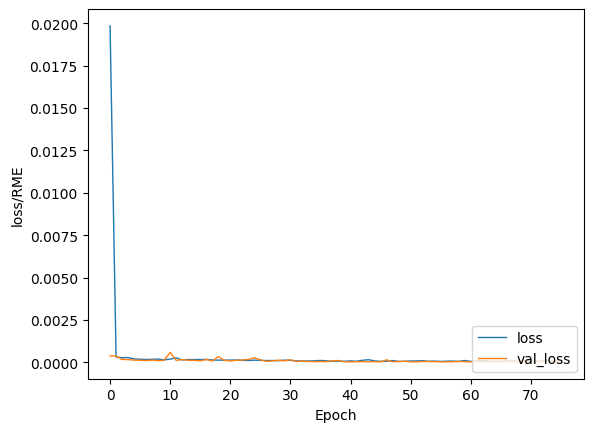

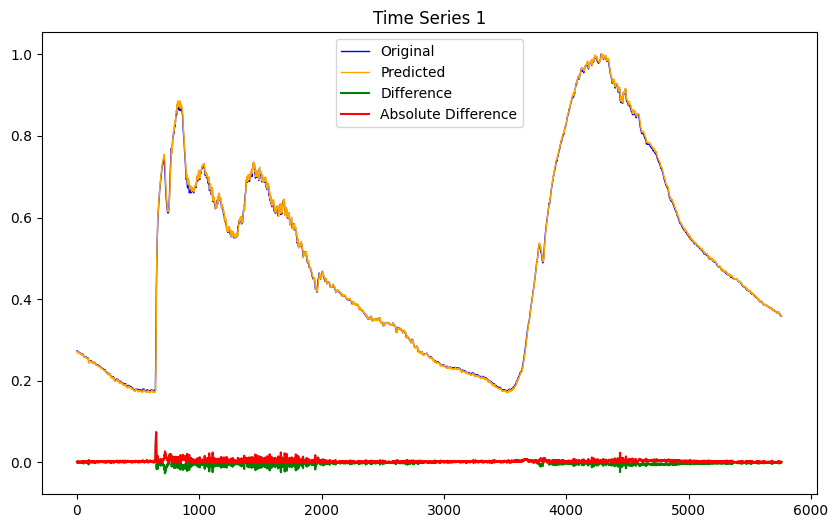

Epoch 1/100
87/87 [==============================] - 1s 6ms/step - loss: 6.3553e-05 - root_mean_squared_error: 0.0080 - val_loss: 1.4190e-05 - val_root_mean_squared_error: 0.0038
Epoch 2/100
87/87 [==============================] - 1s 6ms/step - loss: 6.6807e-05 - root_mean_squared_error: 0.0082 - val_loss: 1.7349e-05 - val_root_mean_squared_error: 0.0042
Epoch 3/100
87/87 [==============================] - 1s 6ms/step - loss: 3.8542e-05 - root_mean_squared_error: 0.0062 - val_loss: 3.4953e-05 - val_root_mean_squared_error: 0.0059
Epoch 4/100
87/87 [==============================] - 1s 6ms/step - loss: 2.4667e-05 - root_mean_squared_error: 0.0050 - val_loss: 5.4254e-05 - val_root_mean_squared_error: 0.0074
Epoch 5/100
87/87 [==============================] - 0s 6ms/step - loss: 2.9293e-05 - root_mean_squared_error: 0.0054 - val_loss: 1.3110e-05 - val_root_mean_squared_error: 0.0036
Epoch 6/100
87/87 [==============================] - 1s 6ms/step - loss: 3.1325e-05 - root_mean_squared_e

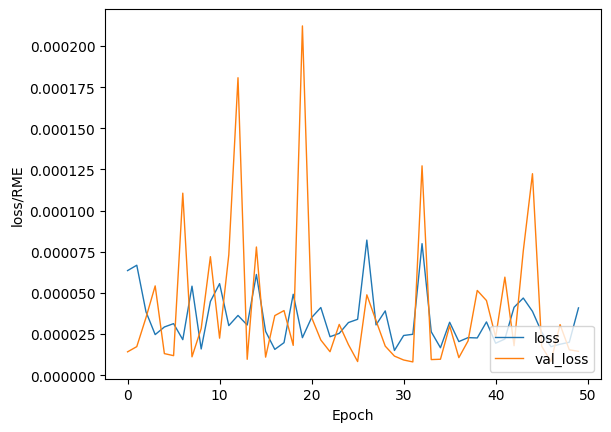

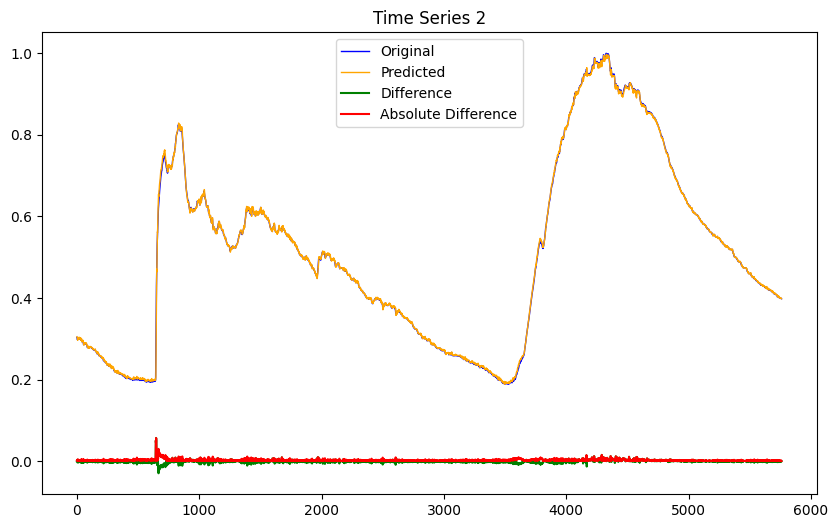

Epoch 1/100
87/87 [==============================] - 1s 7ms/step - loss: 1.7853e-04 - root_mean_squared_error: 0.0134 - val_loss: 1.9412e-05 - val_root_mean_squared_error: 0.0044
Epoch 2/100
87/87 [==============================] - 1s 6ms/step - loss: 4.4495e-05 - root_mean_squared_error: 0.0067 - val_loss: 2.0597e-05 - val_root_mean_squared_error: 0.0045
Epoch 3/100
87/87 [==============================] - 1s 6ms/step - loss: 4.6612e-05 - root_mean_squared_error: 0.0068 - val_loss: 3.3364e-05 - val_root_mean_squared_error: 0.0058
Epoch 4/100
87/87 [==============================] - 1s 6ms/step - loss: 6.5263e-05 - root_mean_squared_error: 0.0081 - val_loss: 5.3003e-05 - val_root_mean_squared_error: 0.0073
Epoch 5/100
87/87 [==============================] - 0s 6ms/step - loss: 7.2769e-05 - root_mean_squared_error: 0.0085 - val_loss: 2.9419e-05 - val_root_mean_squared_error: 0.0054
Epoch 6/100
87/87 [==============================] - 1s 6ms/step - loss: 4.3940e-05 - root_mean_squared_e

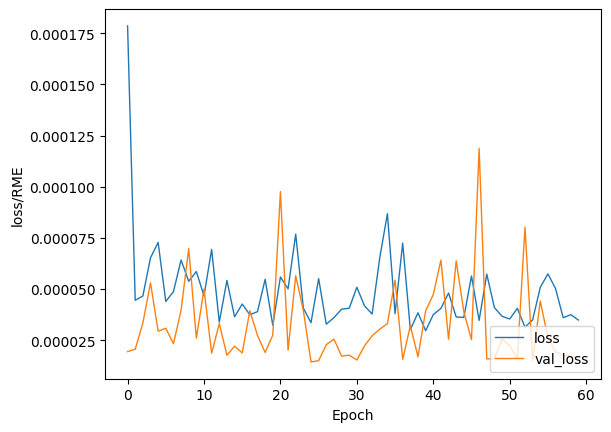

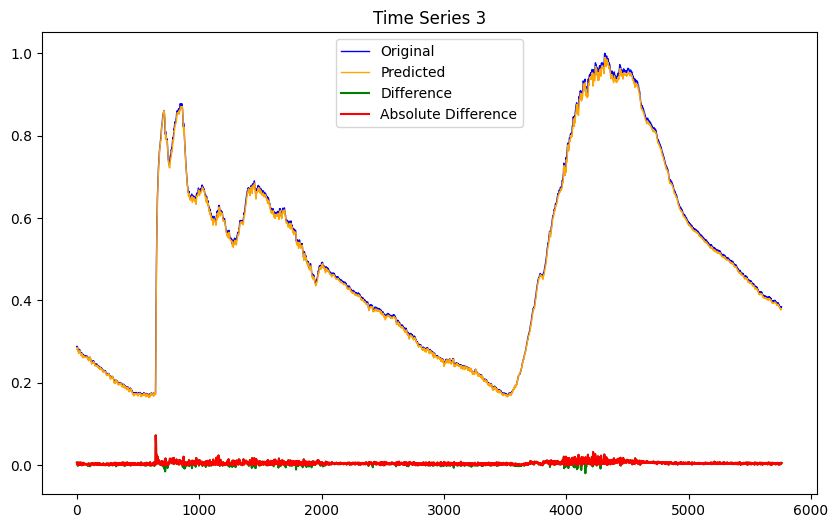

Epoch 1/100
87/87 [==============================] - 1s 6ms/step - loss: 3.8265e-05 - root_mean_squared_error: 0.0062 - val_loss: 2.0656e-05 - val_root_mean_squared_error: 0.0045
Epoch 2/100
87/87 [==============================] - 0s 5ms/step - loss: 3.5660e-05 - root_mean_squared_error: 0.0060 - val_loss: 2.9429e-05 - val_root_mean_squared_error: 0.0054
Epoch 3/100
87/87 [==============================] - 1s 8ms/step - loss: 4.4257e-05 - root_mean_squared_error: 0.0067 - val_loss: 1.2008e-05 - val_root_mean_squared_error: 0.0035
Epoch 4/100
87/87 [==============================] - 1s 8ms/step - loss: 4.4996e-05 - root_mean_squared_error: 0.0067 - val_loss: 7.6088e-05 - val_root_mean_squared_error: 0.0087
Epoch 5/100
87/87 [==============================] - 1s 8ms/step - loss: 4.9872e-05 - root_mean_squared_error: 0.0071 - val_loss: 3.1219e-05 - val_root_mean_squared_error: 0.0056
Epoch 6/100
87/87 [==============================] - 1s 10ms/step - loss: 3.3467e-05 - root_mean_squared_

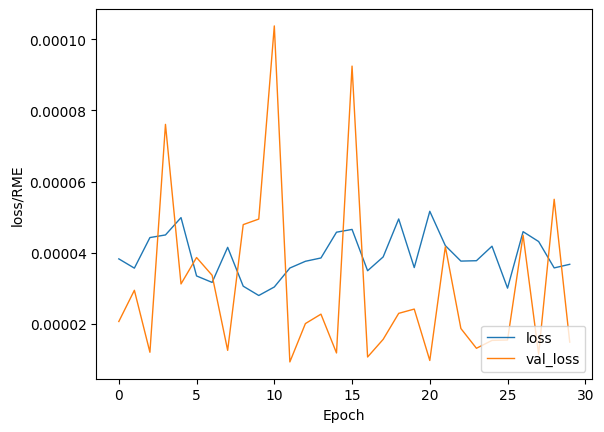

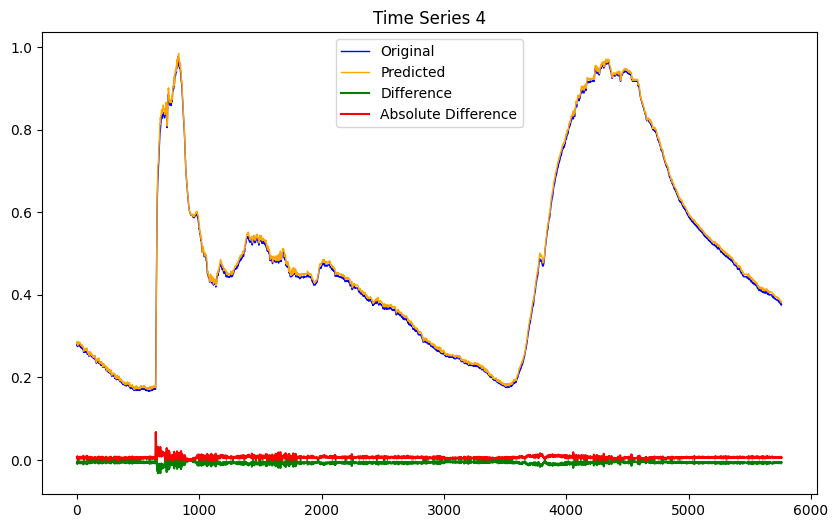

Epoch 1/100
87/87 [==============================] - 1s 6ms/step - loss: 4.3534e-05 - root_mean_squared_error: 0.0066 - val_loss: 4.3447e-05 - val_root_mean_squared_error: 0.0066
Epoch 2/100
87/87 [==============================] - 1s 6ms/step - loss: 3.4799e-05 - root_mean_squared_error: 0.0059 - val_loss: 6.4630e-05 - val_root_mean_squared_error: 0.0080
Epoch 3/100
87/87 [==============================] - 1s 6ms/step - loss: 2.8769e-05 - root_mean_squared_error: 0.0054 - val_loss: 1.2475e-04 - val_root_mean_squared_error: 0.0112
Epoch 4/100
87/87 [==============================] - 1s 6ms/step - loss: 4.4590e-05 - root_mean_squared_error: 0.0067 - val_loss: 7.4436e-05 - val_root_mean_squared_error: 0.0086
Epoch 5/100
87/87 [==============================] - 1s 6ms/step - loss: 3.0406e-05 - root_mean_squared_error: 0.0055 - val_loss: 1.7462e-05 - val_root_mean_squared_error: 0.0042
Epoch 6/100
87/87 [==============================] - 1s 6ms/step - loss: 3.4077e-05 - root_mean_squared_e

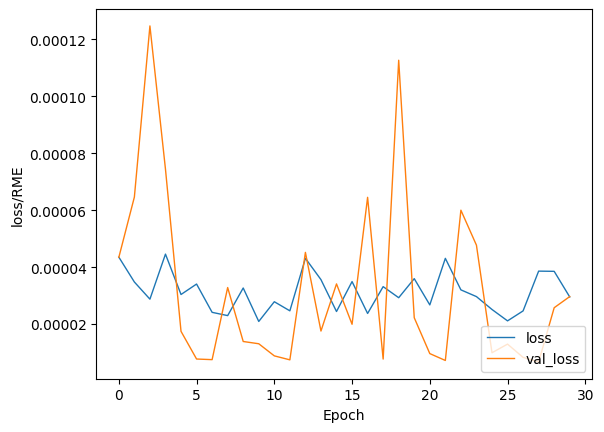

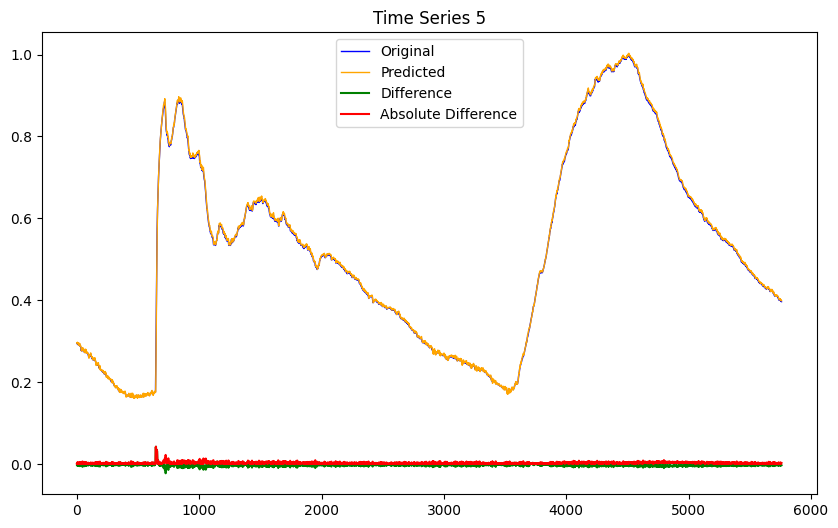

Epoch 1/100
87/87 [==============================] - 1s 11ms/step - loss: 7.2934e-05 - root_mean_squared_error: 0.0085 - val_loss: 3.8744e-05 - val_root_mean_squared_error: 0.0062
Epoch 2/100
87/87 [==============================] - 1s 11ms/step - loss: 6.2083e-05 - root_mean_squared_error: 0.0079 - val_loss: 1.3644e-05 - val_root_mean_squared_error: 0.0037
Epoch 3/100
87/87 [==============================] - 1s 10ms/step - loss: 5.0291e-05 - root_mean_squared_error: 0.0071 - val_loss: 1.3048e-05 - val_root_mean_squared_error: 0.0036
Epoch 4/100
87/87 [==============================] - 1s 8ms/step - loss: 4.9448e-05 - root_mean_squared_error: 0.0070 - val_loss: 1.2958e-05 - val_root_mean_squared_error: 0.0036
Epoch 5/100
87/87 [==============================] - 1s 6ms/step - loss: 3.9973e-05 - root_mean_squared_error: 0.0063 - val_loss: 4.8354e-05 - val_root_mean_squared_error: 0.0070
Epoch 6/100
87/87 [==============================] - 1s 6ms/step - loss: 4.3689e-05 - root_mean_square

KeyboardInterrupt: ignored

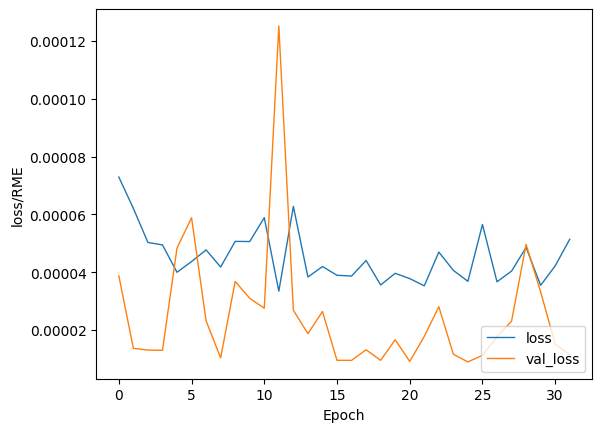

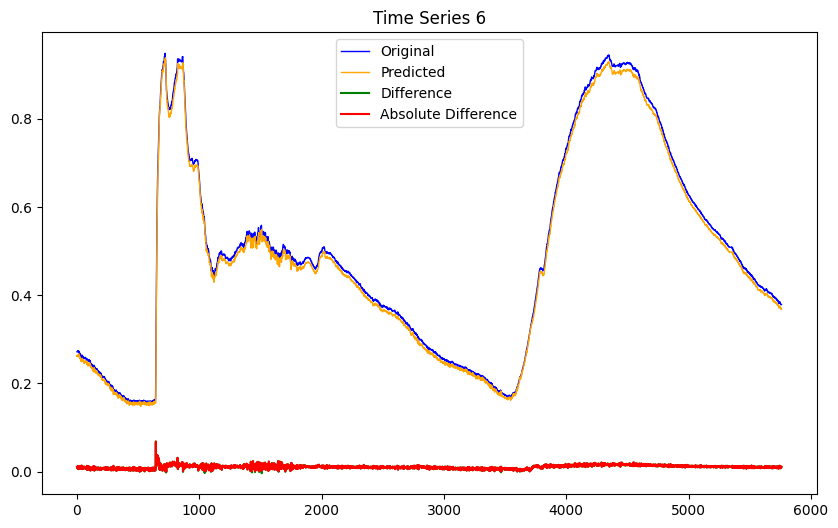

In [ ]:
path_to_save = '/content/drive/MyDrive/Redes Neurais/results/CNN/uni/sensor_'
try:
    os.remove(path_to_save+".json")
except FileNotFoundError:
    pass

for i in range(len(y_t[0])):
    X_ta = X_t[:,:,i]
    y_ta = y_t[:,i]

    X_va = X_v[:,:,i]
    y_va = y_v[:,i]

    history = model.fit(X_ta, y_ta, batch_size=100, epochs=EPOCHS, callbacks=[earlystopper], validation_data=(X_va, y_va))

    plt.plot(history.history['loss'], label='loss', linewidth=1)
    plt.plot(history.history['val_loss'], label = 'val_loss', linewidth=1)
    plt.xlabel('Epoch')
    plt.ylabel('loss/RME')
    plt.legend(loc='lower right')
    plt.savefig(path_to_save+str(i)+'_loss.png')

    predictions = model.predict(X_va)
    predictions = predictions.flatten()
    predictions.shape

    plot_series_diff(y_va, predictions, i=i)

    final_result = {}
    final_result['Sensor'] = i
    final_result['Model'] = 'CNN-univariate'
    final_result['RME_final'] = history.history['root_mean_squared_error'][-1]
    final_result['RME_val_final'] = history.history['val_root_mean_squared_error'][-1]
    final_result['MSE_final'] = history.history['loss'][-1]
    final_result['MSE_val_final'] = history.history['val_loss'][-1]

    with open(path_to_save+".json", "a") as arquivo:
      json.dump(final_result, arquivo)

In [ ]:
from datetime import datetime
import pytz

# Get the current time in Brazil's time zone
brazil_tz = pytz.timezone('America/Sao_Paulo')
current_time = datetime.now(brazil_tz)

# Print the current time
print(current_time)
